# Open dicom images and display them

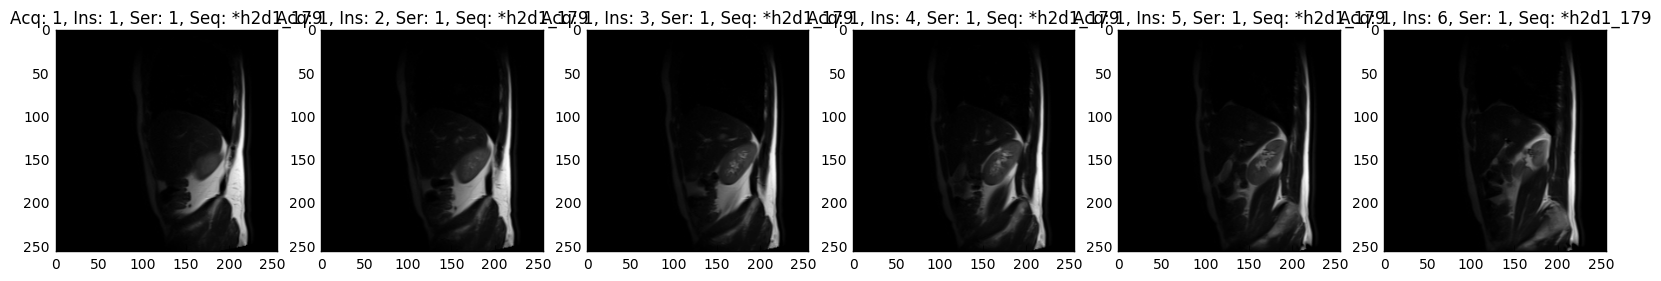

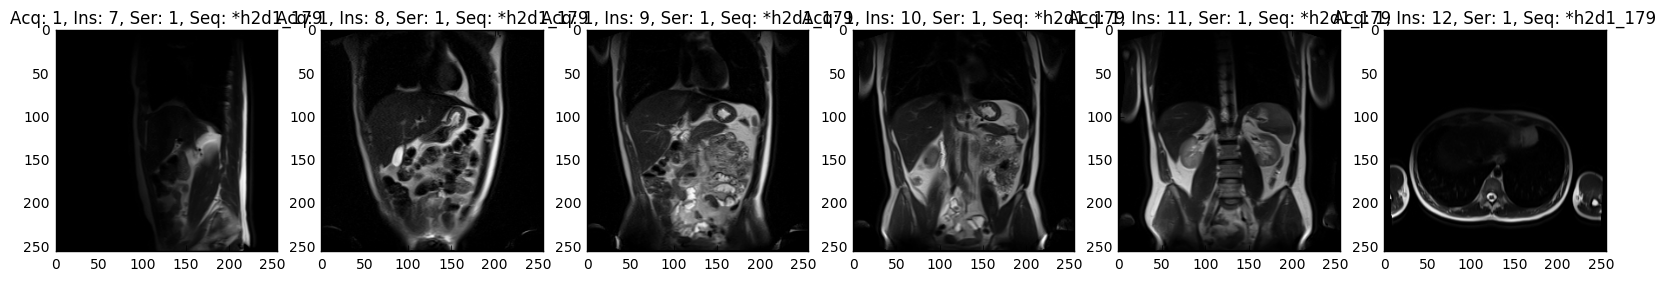

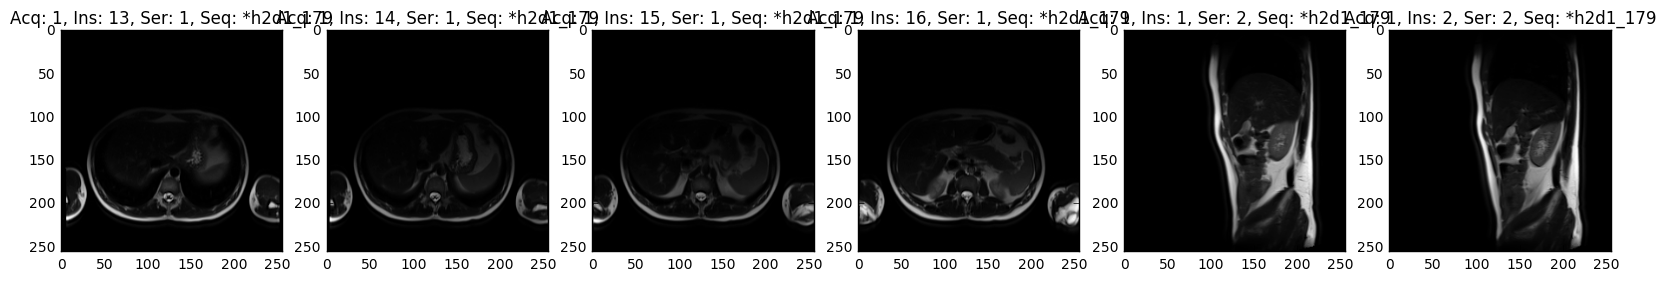

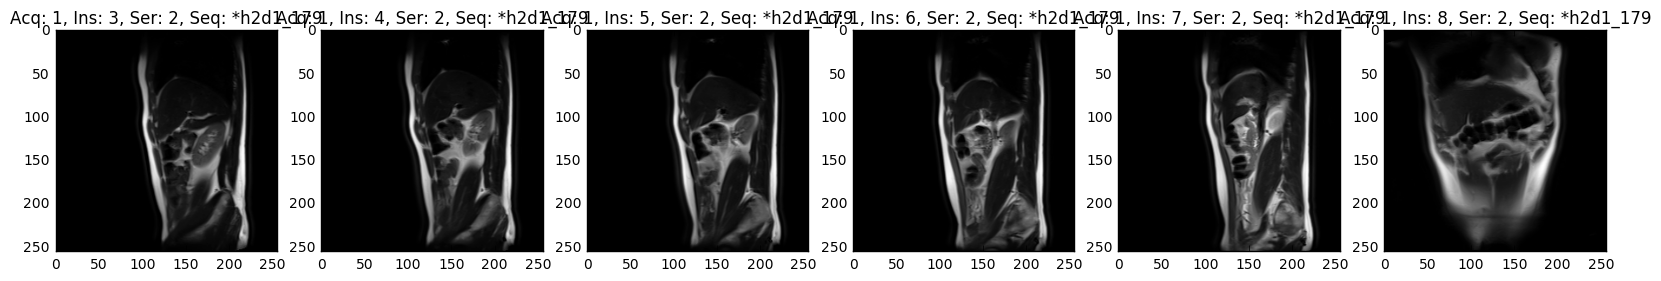

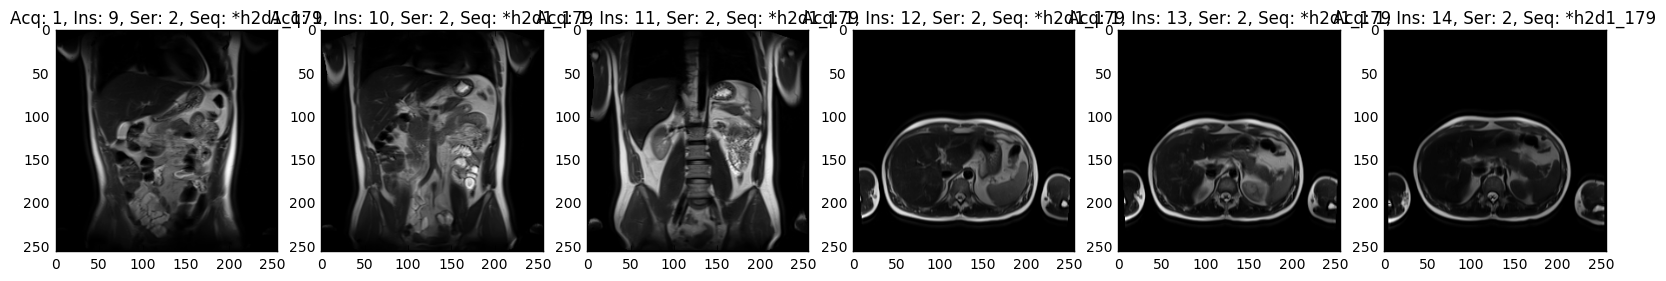

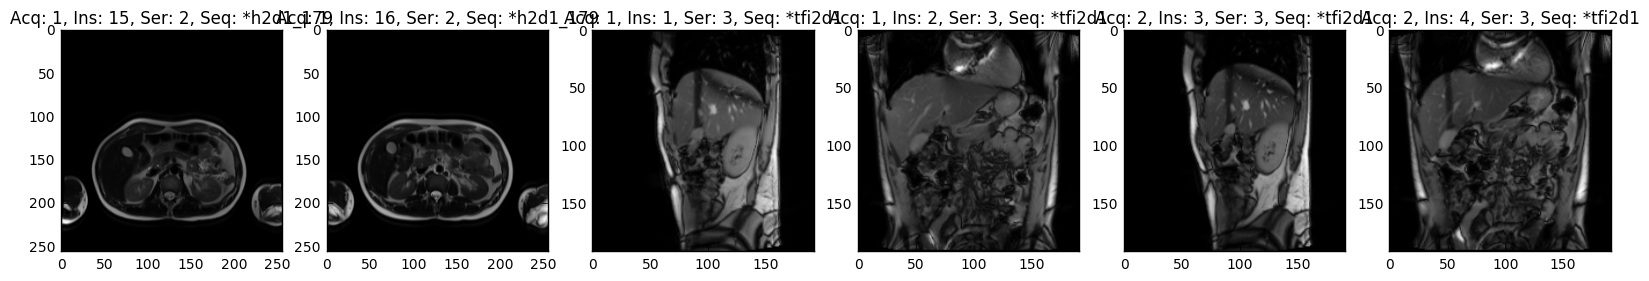

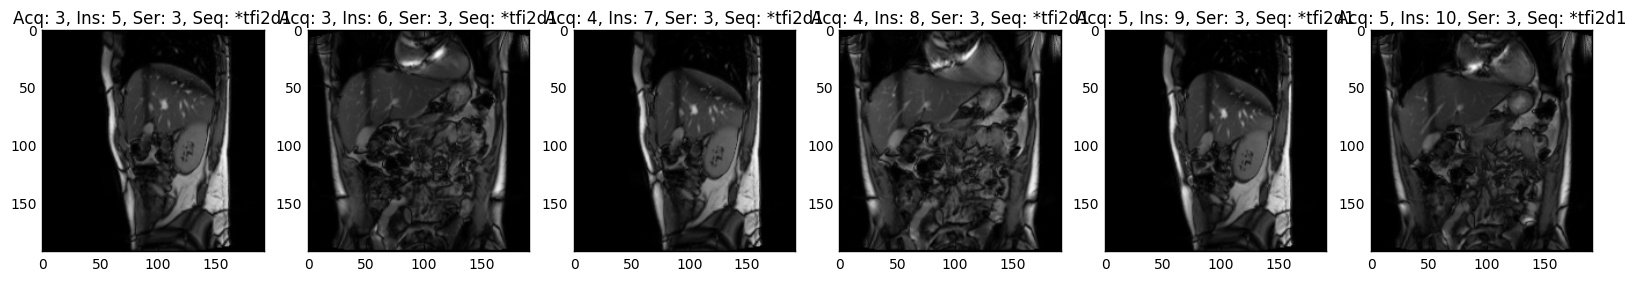

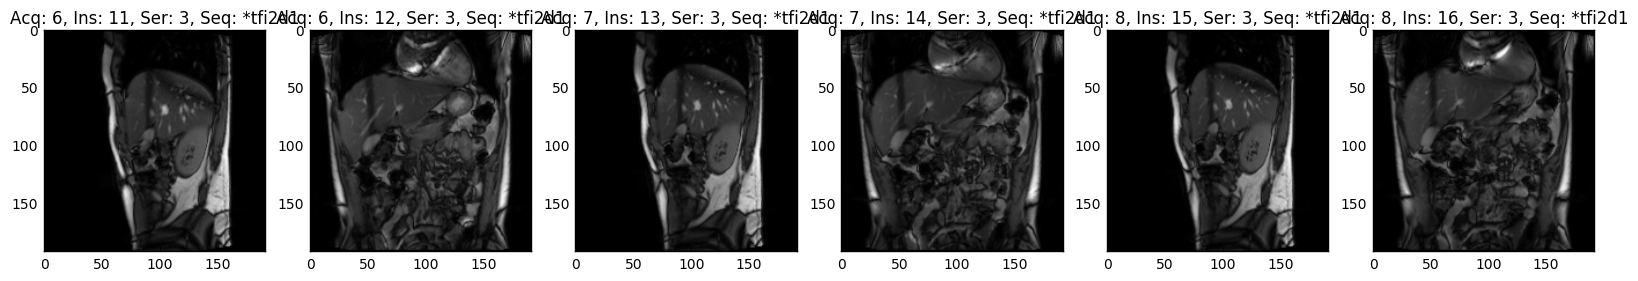

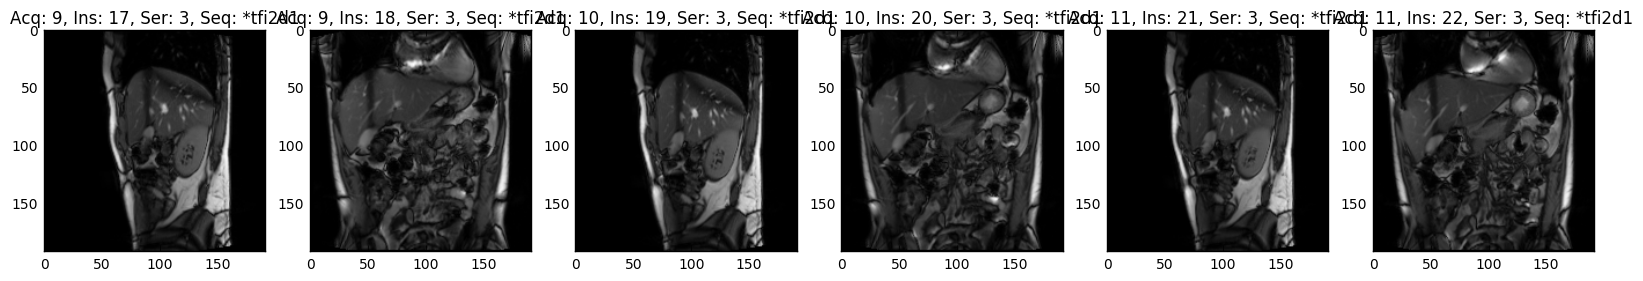

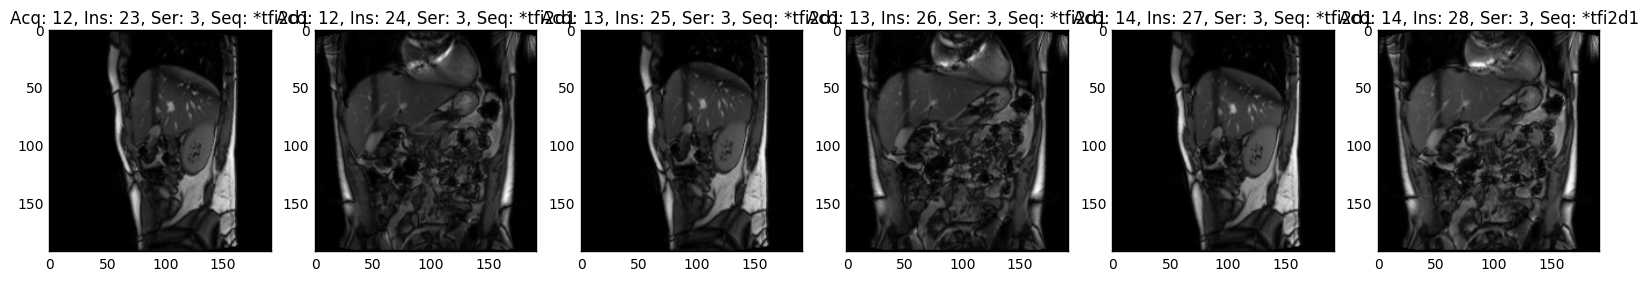

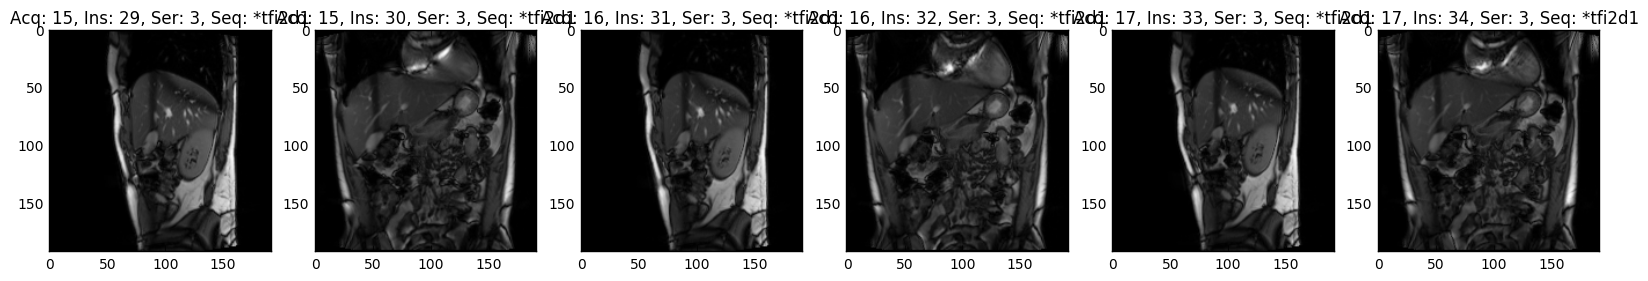

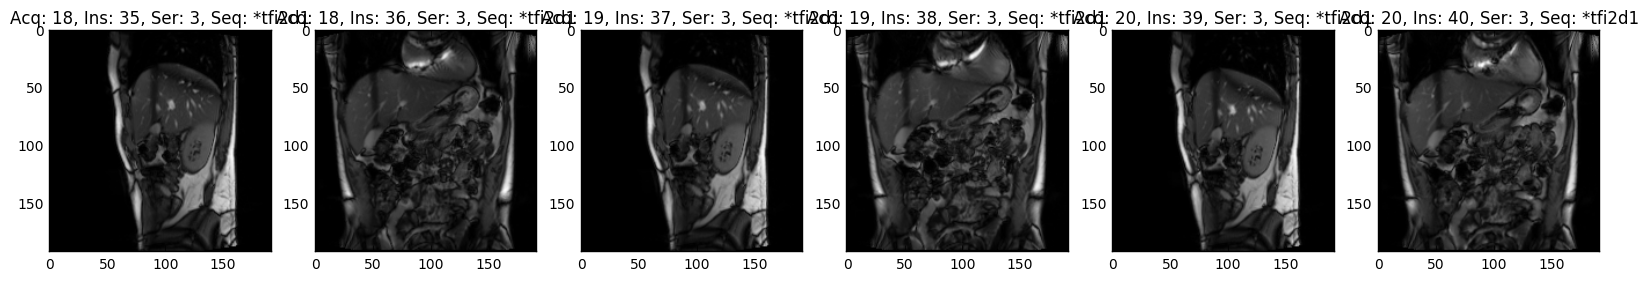

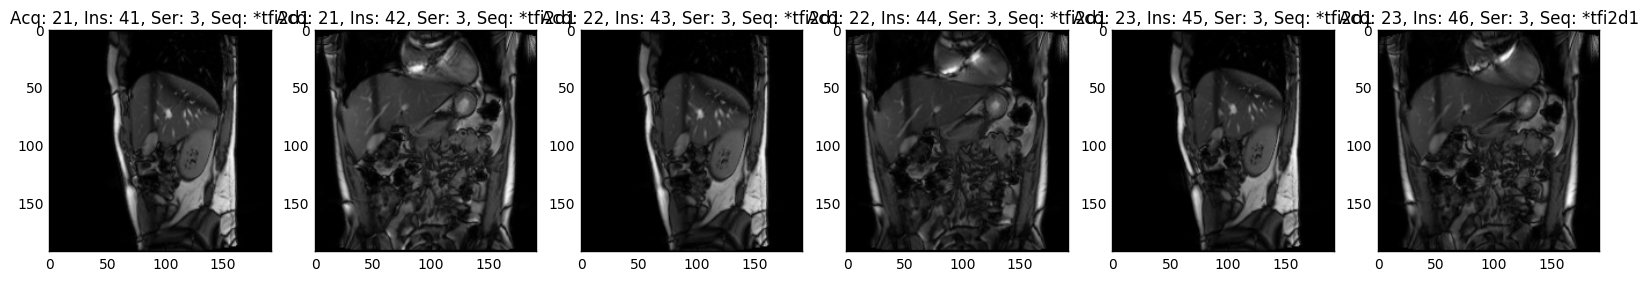

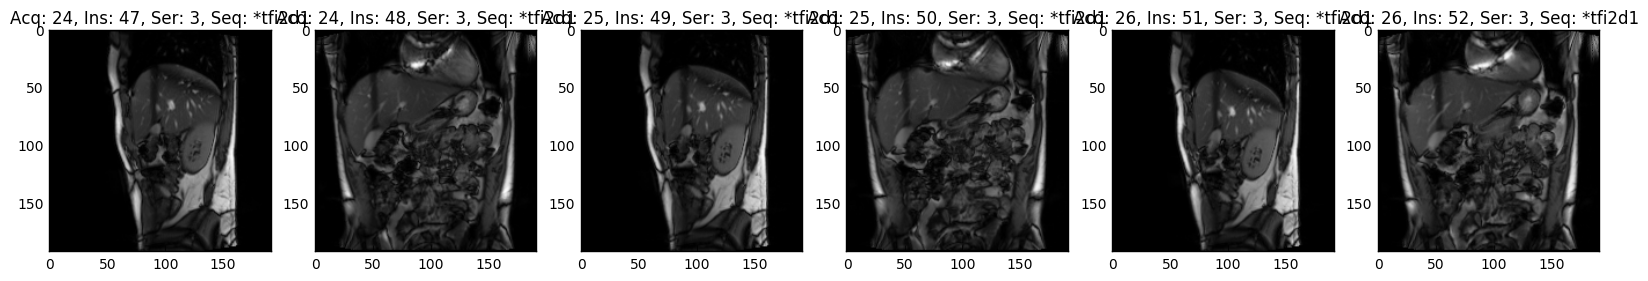

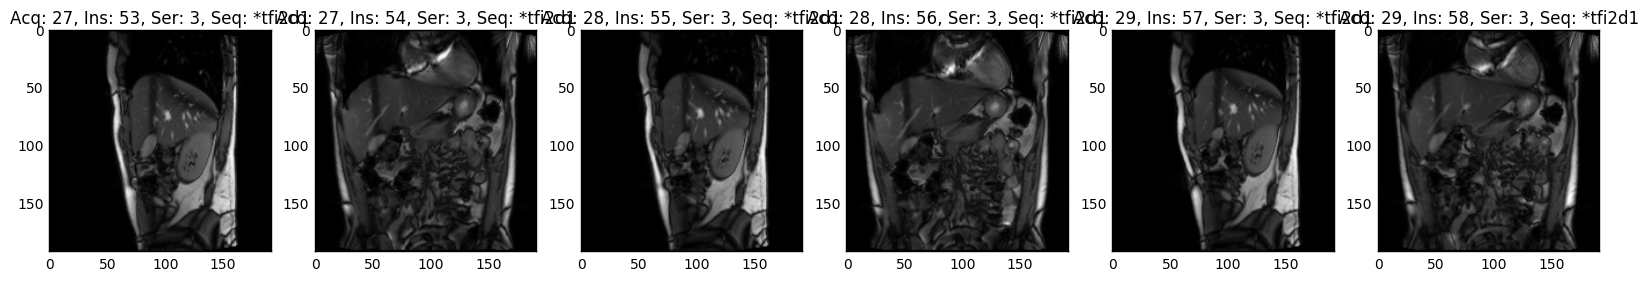

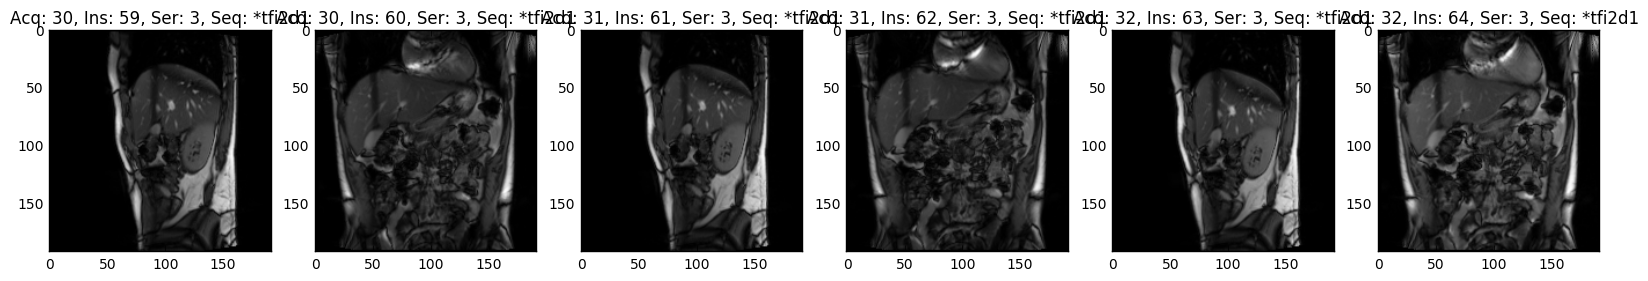

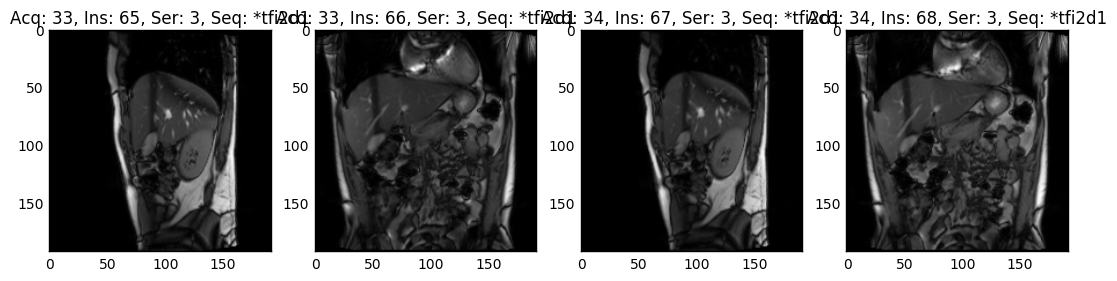

In [1]:
import dicom as dc
import pylab
import matplotlib.pyplot as plt
import numpy
from collections import defaultdict

import glob
#files=glob.glob('data/MR_2016-08-03_160844_IRM.ABDOMEN.SUP.(FOIE,RATE,REINS)_t1.vibe.dixon.tra.caipi4.bh.320.opp_n96__00000/*.dcm')
dicoms = []

for i in range(1,11):
    files=glob.glob('data/SEBJEAN/_{:04d}/*.dcm'.format(i))

    for file in files:
        dicom=dc.read_file(file)
        if (dicom.PatientName=="Henrotin^Sebastien"):
            dicoms.append((dicom.ContentTime,dicom))

sorted_by_second = sorted(dicoms, key=lambda tup: tup[0])

for index, dicom in enumerate(dicoms):
    if (index==100):
        break
    if (index%6==0): 
        fig = plt.figure()
        fig.set_figwidth(20)
    a=fig.add_subplot(1,6,index%6+1)
    a.set_title("Acq: {0}, Ins: {1}, Ser: {2}, Seq: {3}".format(dicom[1].AcquisitionNumber, dicom[1].InstanceNumber, dicom[1].SeriesNumber, dicom[1].SequenceName))
    imgplot = plt.imshow(dicom[1].pixel_array, cmap="Greys_r")
pylab.show()

# Convert images into opencv format

In [2]:
import numpy as np
import cv2

finalImage=cv2.cvtColor(cv2.convertScaleAbs(dicoms[0].pixel_array), cv2.COLOR_GRAY2BGR)

ret,thresh = cv2.threshold(cv2.convertScaleAbs(dicoms[0].pixel_array),0,255,0)
im2, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)

cv2.drawContours(finalImage, contours, -1, (0,255,0), 3)



AttributeError: 'tuple' object has no attribute 'pixel_array'

In [74]:
dicoms[0].pixel_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)